*The code snippet assumes Anaconda 5.2.0 version of Python virtual environment*

<div class="alert alert-info">
    <h4>Acknowledgement</h4>
    <p>I would like to acknowledge <a href="http://www.michaelpyrcz.com/">Micahel Pyrcz</a>, Associate Professor at the University of Texas at Austin in the Petroleum and Geosystems Engineering, for developing course materials that helped me write this article.</p>
    <p>Check out his <a href="https://www.youtube.com/watch?v=Qb8TsSINpnU/">Youtube Lecture on Monte-Carlo Simulation</a> to help yourself better understand the statistical theories and concepts.</p>
</div>

> **Monte Carlo Simulation** is a random sampling method to model uncertainty of a population estimation. When given only population parameters (mean, standard deviation, degrees of freedom, etc..), but not the sample data itself, it generates random samples based on the distribution parameters to create a sample pool that is representative of the true population. Uncertainty models can be created from the newly generated sample pool.

Based on historical data, expertise in the field, or past experience, you might know the typical values of population mean, standard deviation and degrees of freedom. While these parameters are useful for developing a model, they do not tell you the uncertainties in a population. In a financial market, you might know the distribution of possible values through the mean and standard deviation of returns. By using a range of possible values, instead of a single guess, you can create a more realistic picture of what might happen in the future. 

Let's assume that your consultant recommended you a certain investment program that has a mean return rate of 10% and a standard deviation of 1% **However, You do not have an access to the actual sample data that is used to obtain the mean, and standard deviation**. You made 100 investments through this program, but your 100 investments had an average rate of return of 3%. Did the consultant lie to you, or is it one of the possible corner cases that you can have if you are unlucky? What is the P10, P50, P90 value of this investment program? What are the the most plausible *range* of rate of return? Does your 3% rate of return fall within that *range*?

In order to answer these questions, you need sample data that is representative of the population. Monte-Carlo simulation takes population parameters as arguments, and generates series of random samples to investigate a *range of possible outcomes*.

**Methodology**

Monte-Carlo simulation is one of the random sampling method that generates a new set of random samples from statistic parameters of a population. It assumes a certain distribution shape, and population parameters as input and returns a random sample based on the distribution shape and parameters. The most simple examples are as follows:

<br>
<span class="label" style="background-color: #5cb85c;">Excel</span>

Gaussian:  <code>NORM.INV(RAND(), mean, stdev)</code>

Lognormal: <code>LOGNORM.INV(RAND(), mean, stdev)</code>

Chi-Square: <code>CHISQ.INV(RAND(), degree_freedom)</code>

F-distribution: <code>F_INV(RAND(), degree_freedom_numerator, degree_freedom_denominator)</code>

<br>
<span class="label" style="background-color:#1ABB9C">Python</span>

Gaussian:  <code>np.random.normal(mean, stdev)</code>

Lognormal: <code>np.random.lognormal(mean, stdev)</code>

Chi-Square: <code>np.random.chisquare(degree_freedom)</code>

F-distribution: <code>np.random.f(degree_freedom_numerator, degree_freedom_denominator)</code>
    
These examples are the most simple cases of generating random samples vis Monte-Carlo simulation. Random samples can be generated as many times as desired. Based on the N-number of random samples generated, you can draw a CDF or boxplot to model uncertainty in prediction.

<div class="alert alert-info">
    <h4>Warning!</h4>
    <p>In order to use Monte-Carlo simulation, you must know the distribution shape (normal, lognormal, chi-square, etc..) and distribution parameters (mean, standard deviation, degrees of freedom, etc..) of the data. If you do not have enough samples to draw an uncertainty model, or do not know the distribution shape and parameters, <a href="https://nbviewer.jupyter.org/github/aegis4048/Petroleum_Engineering/blob/master/Data%20Analysis/Non-Parametric%20Confidence%20Intervals%20with%20Bootstrap.ipynb">Bootstrap</a> simulation may address your issue.</p>
</div>

Random samples of interest can can be created via an applied form of Monte-Carlo simulation. For example, the **Casino Dice Roll Example** simulates a game 1,000 times for a single player, and calculates a player's final fund at the end. The final fund of a single player is one random Monte-Carlo sample. The process is repeated 100 times to account for 100 players' final fund, and now we have 100 random Monte-Carlo samples. **Total Thickness of Two Formations Example** generates two sets of Monte-Carlo formation samples N times (where N is arbitrary number of your choice) to account for Formation A, and Formation B. The two sets of Monte-Carlo formation data are then added together to obtain Monte-Carlo data for total thickness.


## 1. Casino Dice Roll Example

How do casinos earn money? The answer is simple - the longer you play, the bigger the chance of you losing money.

Let's assume an imaginary dice roll game between a casino house and a player. The rules are simple.

** Dice Roll Game Rules **

1. There is an imaginary dice that rolls between 1 to 100.
2. If a player rolls between 1 to 51, the house wins.
3. If a player rolls between 52 to 100, the player wins.
4. A player can bet as many times as he wants.

With the above rules, **the house has 2% higher chance of winning over a player**. As a financial analyst of the house, upper management wants you to create a Dice Roll game profit forecast model.

<div class="alert alert-info">
    <p><b>Question :</b> If a certain game is configured so that the <i>house has 2% higher chance of winning over a player</i>, what is the expected profit forecast model for the game?</p>
</div>

Monte-Carlo simulation can be used to simulate the possible outcomes of dice roll game, and generate a forecast model.

### 1.0 Game Simulator Scripts

**Imports**

In [2]:
import random
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

** Dice Roll Simulation **

In [3]:
def rolldice():
    dice = random.randint(1,100)
    if dice <= 51:                     # Player loses
        return False
    elif dice > 51 & dice <= 100:      # Player wins
        return True

** Single Game Simulation **

In [4]:
def play(total_funds, wager_amount, total_plays, final_fund):

    play_num = []       # x-axis of the plot
    funds = []          # y-axis of the plot

    play = 1
    while play <= total_plays:
        
        if rolldice():                                # Player wins
            total_funds = total_funds + wager_amount  # updates current total funds
            play_num.append(play)
            funds.append(total_funds)

        else:                                         # Player loses
            total_funds = total_funds - wager_amount 
            play_num.append(play)
            funds.append(total_funds)
            
        play = play + 1

    final_fund.append(funds[-1])                      # final_fund contains the ending fund of all players
    
    return final_fund, play_num, funds          

** Results Visualization **

In [5]:
def simulate_visualize(init_money, bet, num_bet, num_players=1):      # simulates and generates a plot
    f, ax = plt.subplots()
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        ax.plot(num_play,funds_record)
        count += 1

    ax.set_title(str(num_players) + ' Player(s): ' + 'Change in Total Fund with Each Game')
    ax.set_ylabel('Player\'s Fund ($)')
    ax.set_xlabel('Number of Bets')
    
    return ending_fund_all_players

In [6]:
def simulate(init_money, bet, num_bet, num_players=1):                # simulates, but does not plot
    count = 1
    ending_fund_all_players = []
    while count <= num_players:
        ending_fund_all_players, num_play, funds_record = play(init_money, bet, num_bet, ending_fund_all_players)
        count += 1
    
    return ending_fund_all_players

### 1.1 Monte-Carlo Simulation: 1 Player

Let's say than an imaginary player, 'Eric', visits the house and wants to play the Dice Roll Game. A Monte-Carlo simulation can be run to simulate the result of Eric's game.

The simulation will be run with the following conditions:

1. Eric starts with \$10,000
2. Eric bets \$100 each time
3. Eric plays the game 1,000 times


<IPython.core.display.Javascript object>


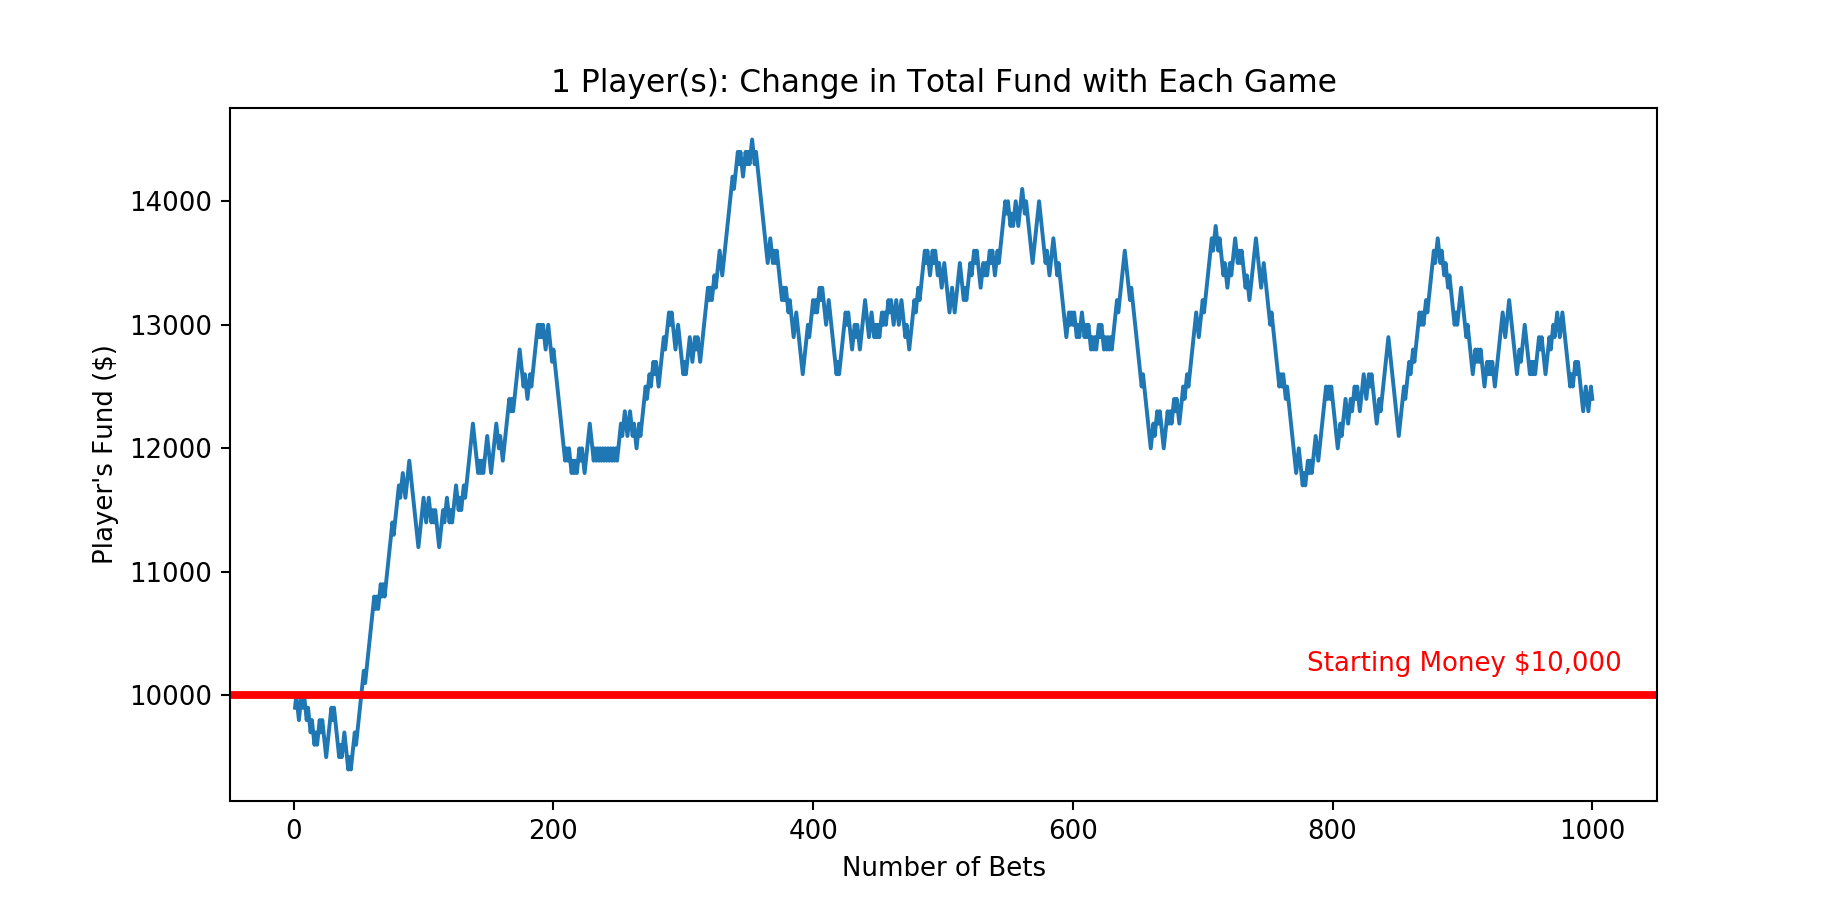

In [148]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=1)
plt.axhline(10000, color="red", linewidth=3)
plt.text(780, 10200, 'Starting Money $10,000', color='red');

Eric started with 10,000 dollars. To your surprise, Eric actually ended up earning money from the house by **2,500 dollars** after **1,000 games**. According to the configuration of the game, the house has **2% higher chance of winning** over Eric. Therefore, with such a high number of games, like a thousand, the house was supposed to earn money from the player. But it was not the case here.

Was the configuration of the game wrong, or was Eric just really lucky?

### 1.1 Monte-Carlo Simulation: 100 Players

Eric earned **$2,500 dollars** after running 1,000 games. However, if hundred other players play the Dice Roll game for thousand times each, would the result be different? From the house's perspective, what is the expected profit from the Dice Roll game?

To get more accurate estimation of the expected profit, multiple Monte-Carlo simulation will be run. In this case, hundred.

The simulation will be run with the following conditions:

1. Hundred players each start with \$10,000
2. Hundred players bet \$100 each time
3. Hundred players play the game 1,000 times

<IPython.core.display.Javascript object>


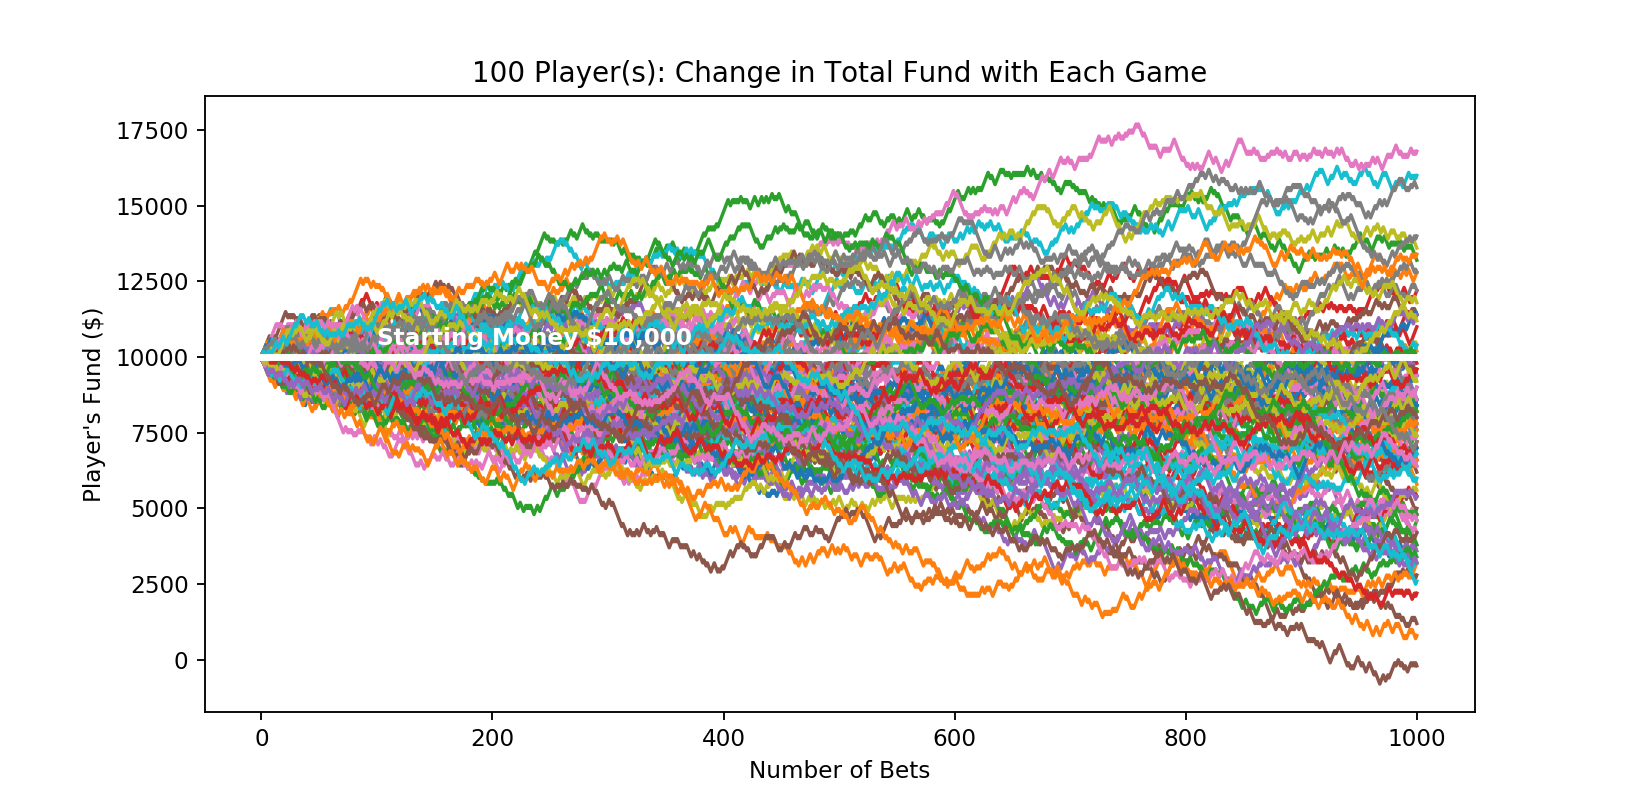

In [7]:
simulate_visualize(init_money=10000, bet=100, num_bet=1000, num_players=100)
plt.axhline(10000, color="white", linewidth=3)
plt.text(100, 10400, 'Starting Money $10,000', color='white', weight='bold');

As it can be shown on the plots, Eric's earning **2,500 dollars** after 1,000 games was a plausible outcome. There was even a player who eanred ended up with 16,500 dollars, which means that he earned **6,500 dollars**! However, this does not mean that the house will earn negative profit. The plot clearly indicates overall trend in the house earning money over the players as the number of bets increases. 

### 1.3 Uncertainty Modeling

The previous simulation results represent the outcome of **100 players** each playing **1,000 games**. One hundred Monte-Carlo simulations were run, and now we have one hundred samples of 1,000 game simulations data. 

To obtain more accurate uncertainty model for the Dice Roll game, further simulations will be run for **1,000 players** each playing **100, 1,000, 10,000, and 100,000 games**. 

In [6]:
df = pd.DataFrame()
for num_games in [100, 1000, 5000, 10000]:
    result = simulate(init_money=10000, bet=100, num_bet=num_games, num_players=1000)
    col_name = str(num_games) + ' Games ($)'
    df[col_name] = result

In [7]:
df.index.name = 'Player Number'
df.head(10)

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
Player Number,,,,
0,8400,7000,5800,-15600
1,8600,8000,16000,-34800
2,9600,7600,-400,5000
3,9400,10400,-6600,-11200
4,9400,10600,-400,0
5,8600,7200,-200,-19600
6,10800,7800,5600,-14000
7,9800,12400,-4000,-6200
8,10600,7600,24600,-9400


<IPython.core.display.Javascript object>


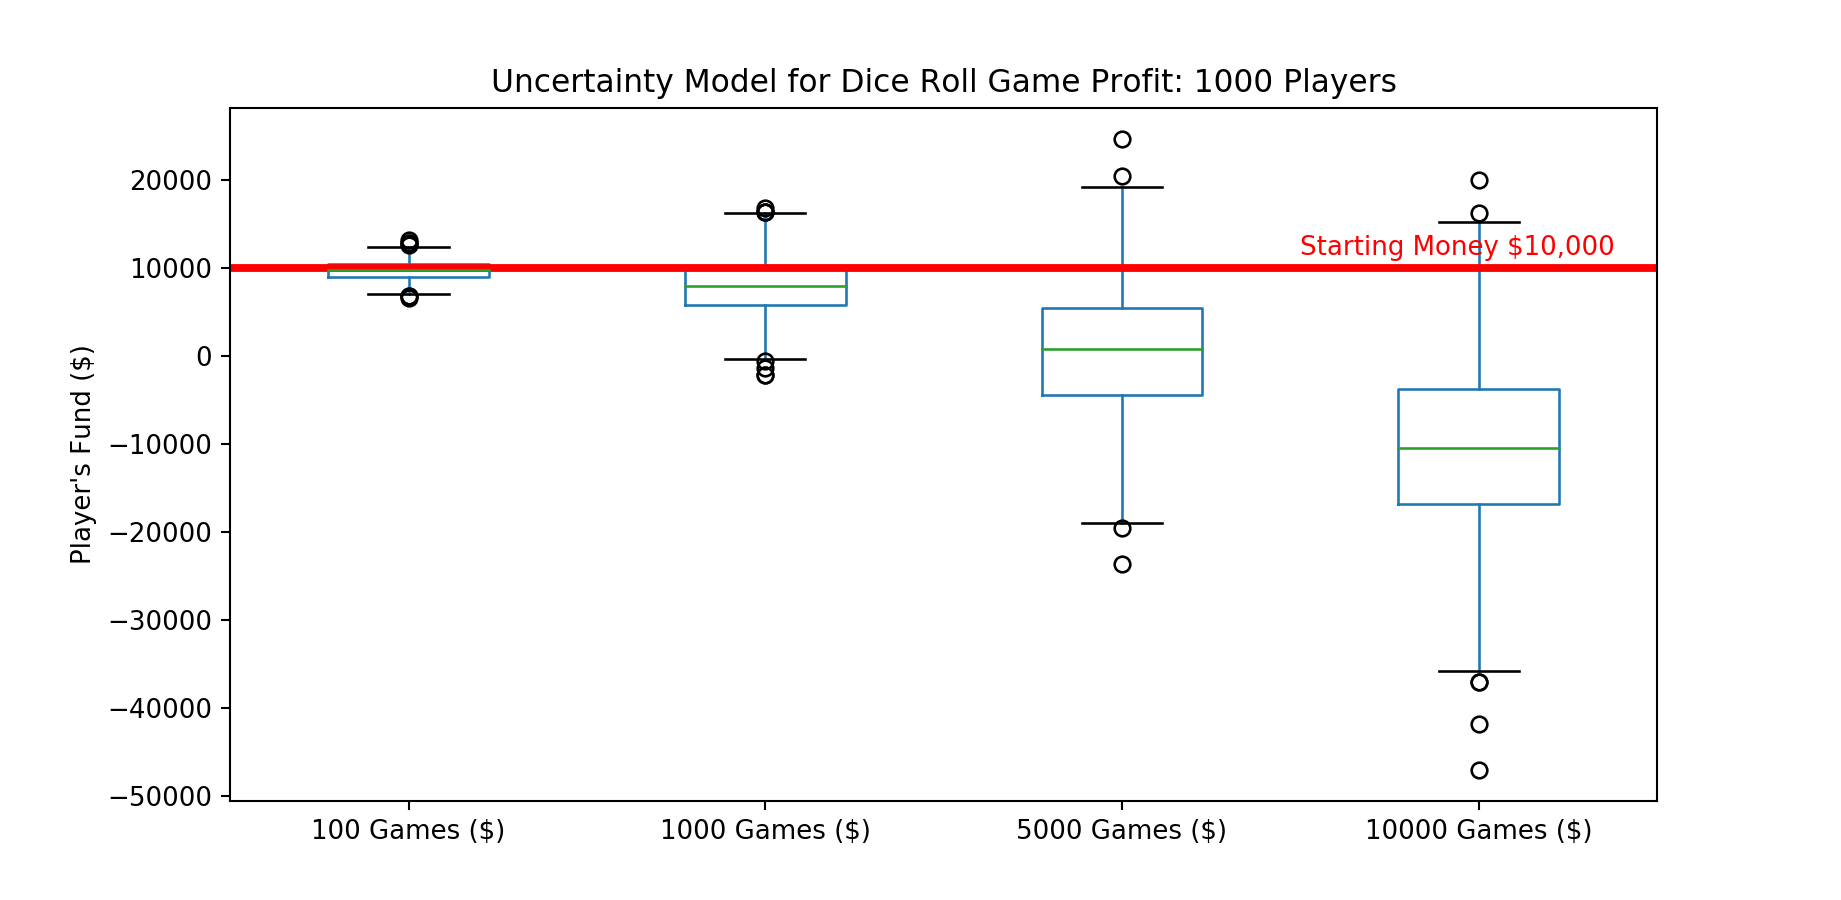

In [10]:
ax = df.boxplot(grid=False)
ax.set_title('Uncertainty Model for Dice Roll Game Profit: 1000 Players')
ax.set_ylabel('Player\'s Fund ($)')
ax.axhline(10000, color="red", linewidth=3);
ax.text(3.5, 11500, 'Starting Money $10,000', color='red');

The generated box plot is the forecast model for the Dice Roll game profit generation. It tells you the most likely **range** of profit expected for N number of games played for each player.

Based on the box plot uncertainty model, you can confirm that the longer you play, the bigger chance of you losing money. Although some lucky players may double, or even triple their money at the casino, far bigger population of the players will end up losing money to the casino. Recall that the Dice Roll game was configured so that the Casino has **2% higher chance of winning** the game over a player.

<div class="alert alert-info">
    <h4>Summary:</h4>
    <p>A player starts with 10,000 dollars and bets 100 dollar for each game.</p>
    <ul tye="square">
        <li>If a player plays    100 games, he will most likely end up between 12,500 to 6800 dollars </li>
        <li>If a player plays   1000 games, he will most likely end up between 15,800 to $-$360 dollars</li>
        <li>If a player plays  5,000 games, he will most likely end up between 19,200 to $-$18,900 dollars</li>
        <li>If a player plays 10,000 games, he will most likely end up between 15,200 to $-$36,000 dollars</li>
    </ul>
</div>


### 1.4 Outlier Removal and Mean of the Prediction

The uncertainty model generated by Monte-Carlo simulations gives you a *range* of possible outcome. But what if you want a single *value* of the outcome? 

One simple way to address this question is to just calculate the average of the simulated data.

** Means of simulated data BEFORE outlier removal **

In [192]:
raw_mean = pd.DataFrame(df.describe().T['mean']).T
raw_mean.rename(index={'mean': 'original mean'}, inplace=True)
raw_mean

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9812.4,7930.8,214.0,-9865.2


But as it can be observed in the boxplot, the simulated data contains outliers (circled points). One might want to remove these outliers before calculating the average of the data to improve accuracy. The traditional IQR outlier detection method can be implemented.

<p><center>IQR = P75 - P25</center></p>

<p><center>Lower Fence = P25 - 1.5 $\times$ IQR</center></p>

<p><center>Upper Fence = P75 + 1.5 $\times$ IQR</center></p>

In [1]:
def get_outlier_params(orig_data):
    iqr_params = orig_data.describe().T[['25%' , '75%']]
    iqr_params['IQR'] = iqr_params['75%'] - iqr_params['25%']
    iqr_params['Lower Fence'] = iqr_params['25%'] - 1.5 * iqr_params['IQR']
    iqr_params['Upper Fence'] = iqr_params['75%'] + 1.5 * iqr_params['IQR']
    return iqr_params

In [194]:
iqr_params = get_outlier_params(df)
iqr_params

,25%,75%,IQR,Lower Fence,Upper Fence
100 Games ($),9200.0,10600.0,1400.0,7100.0,12700.0
1000 Games ($),6000.0,10200.0,4200.0,-300.0,16500.0
5000 Games ($),-4450.0,5200.0,9650.0,-18925.0,19675.0
10000 Games ($),-16600.0,-3150.0,13450.0,-36775.0,17025.0


** Means of simulated data AFTER outlier removal **

In [195]:
def remove_outliers(outlier_params, data):
    outlier_removed_df = pd.DataFrame()
    for column in data.columns:
        outlier_removed_df[column] = data[column].apply(lambda x: x if x > outlier_params['Lower Fence'][column] else np.nan)
        outlier_removed_df[column] = data[column].apply(lambda x: x if x < outlier_params['Upper Fence'][column] else np.nan)
    return outlier_removed_df

In [196]:
new_df = remove_outliers(iqr_params, df)
new_mean = pd.DataFrame(new_df.describe().round(1).T['mean']).T
new_mean.rename(index={'mean': 'outlier-removed mean'}, inplace=True)

pd.concat([raw_mean, new_mean])

,100 Games ($),1000 Games ($),5000 Games ($),10000 Games ($)
original mean,9812.4,7930.8,214.0,-9865.2
outlier-removed mean,9800.2,7892.8,172.7,-9950.1


<div class="alert alert-info">
    <p>Based on the simulated mean of each players Dice Roll game result, it can be observed that <b>a player will lose ~20,000 dollars</b> if he plays the <b>10,000 games</b>, betting 100 dollars each game.</p>
</div>

## 2. Oil Field Example: Total Thickness of Two Formations

Your company is about to drill into two formations: *formation A* and *formation B*. From the previous experiences within the asset, you know the the distribution of each formation's thickness (which is rarely the case...). In order to develop production / facility plans, you need to draw an uncertainty model for the total thickness of *formation A* + *formation B*.

![Formations](jupyter_images/formation_thickness.png)

### 2.0.1 Assumptions

Before Monte-Carlo simulation is run to develop the uncertainty model, a few assumptions will be made. 

1. The formation thickness in the asset has Gaussian distribution
2. Formation A has a mean value of 10 ft, and standard deviation of 2 ft.
3. Formation B has a mean value of 24 ft, and standard deviation of 4 ft.
4. The mean and standard deviation were calculated from large enough samples, and their values are reliable.
5. We are not given any sample data set. We are only given mean and standard deviations.

In [18]:
assumptions = pd.DataFrame(data=[[10, 24],[2, 4]], columns=['Formation A (ft)', 'Formation B (ft)'], index=['mean', 'stdev'])
assumptions

,Formation A (ft),Formation B (ft)
mean,10,24
stdev,2,4


Recall that Monte-Carlo simulation requires the distribution shape and distribution parameters of the population. If we know the distribution shape, but do not have large enough samples to estimate reasonable values for the mean and the standard deviation of the population, Monte-Carlo simulation for Gaussian distribution may return inaccurate results. This can't really be helped since we just don't have enough samples.

Furthurmore, if we have reasonably large enough samples, but do not know the distribution shape, **Monte-Carlo simulation cannot be run**. Recall that when generating random samples, it assumes a certain form of a distribution. (Ex: <code>numpy.random.normal()</code>, <code>numpy.random.lognormal()</code>, <code>numpy.random.chiquare()</code>).


<div class="alert alert-info">
    <h4>Notes</h4>
    <p>If Monte-Carlo simulation cannot be run because the distribution shape is unknown, non-parametric <a href="https://nbviewer.jupyter.org/github/aegis4048/Petroleum_Engineering/blob/master/Data%20Analysis/Non-Parametric%20Confidence%20Intervals%20with%20Bootstrap.ipynb">Bootstrap</a> simulation can be used to generate random samples.</p>
</div>

### 2.0.2 Why Use Monte-Carlo Simulation? 

One might ask why Monte-Carlo simulation is needed for this task. Why can't we just add the provided means of the two formations and use it for our thickness model? 

<p><center>Total Thickness = Form. A Mean Thickness + Form. B Mean Thickness</center></p>
<p><center>Total Thickness = 10 ft + 24 ft = 34 ft</center></p>

However, this simple forecast model does not give any information about the uncertainty in the total thickness of the formation. That is, we only know the overall **mean** thickness, but nothing about the possible **range** of thickness of the formations. Ideally we want to formulate something like the following:

<div class="alert alert-info">
    <p>The total formation thickness will fall within the range of 27 ~ 41 ft by 80% chance, with 34 ft being the mean of the distribution.</p>
</div>

When we are given only the estimated mean and standard deviation of the population, uncertainty model cannot be formulated without some kind of random sampling method. Monte-Carlo simulation can be used to generate a pool of random samples.

### 2.1 Monte-Carlo Simulation for Gaussian Distribution

** Steps **
1. Using the provided mean and standard deviation, generate a random Gaussian distribution of Formation A and B thickness. Recall that we assumed the thickness distribution to be Gaussian. Generate random thickness values N times.
2. Add the randomly generated thickness values for Formation A and B. 
3. Generate visualizations (CDF, boxplot, etc...)

The distribution is Gaussian, and therefore <code>np.random.normal()</code> will be used to generate random normal distribution of formation thickness. If the distribution was assumed to be non-Gaussian, other function will be used to create random samples. For more information, check the numpy documentation of [random sampling for various distributions](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html). 

In [19]:
mean_A = assumptions['Formation A (ft)']['mean']
mean_B = assumptions['Formation B (ft)']['mean']
std_A = assumptions['Formation A (ft)']['stdev']
std_B = assumptions['Formation B (ft)']['stdev']

iteration = 1000

monte_A = np.random.normal(mean_A, std_A, iteration)   
monte_B = np.random.normal(mean_B, std_B, iteration)
total_thic = monte_A + monte_B

df_thic = pd.DataFrame([monte_A, monte_B, total_thic], index=['Formation A (ft)', 'Formation B (ft)', 'Total Thickness (ft)']).T
df_thic.index.name = 'Iteration'
df_thic.round(1).head(10)

,Formation A (ft),Formation B (ft),Total Thickness (ft)
Iteration,,,
0,7.3,29.4,36.6
1,9.4,28.7,38.1
2,7.7,18.5,26.1
3,11.0,33.1,44.1
4,8.1,21.8,29.9
5,10.0,23.2,33.2
6,10.2,26.5,36.7
7,10.8,25.5,36.3
8,10.8,22.7,33.4


** Visualizations ** 

Cumulative probablity function (CDF) and boxplot can be used to visualize the simulation result.

In [33]:
def visualize_distribution(dataframe, ax_):
    dataframe = dataframe.apply(lambda x: x.sort_values().values)
    
    for col, label in zip(dataframe, dataframe.columns):
        fit = scipy.stats.norm.pdf(dataframe[col], np.mean(dataframe[col]), np.std(dataframe[col]))
        ax_.plot(dataframe[col], fit)
    ax_.set_ylabel('Probability')

<IPython.core.display.Javascript object>


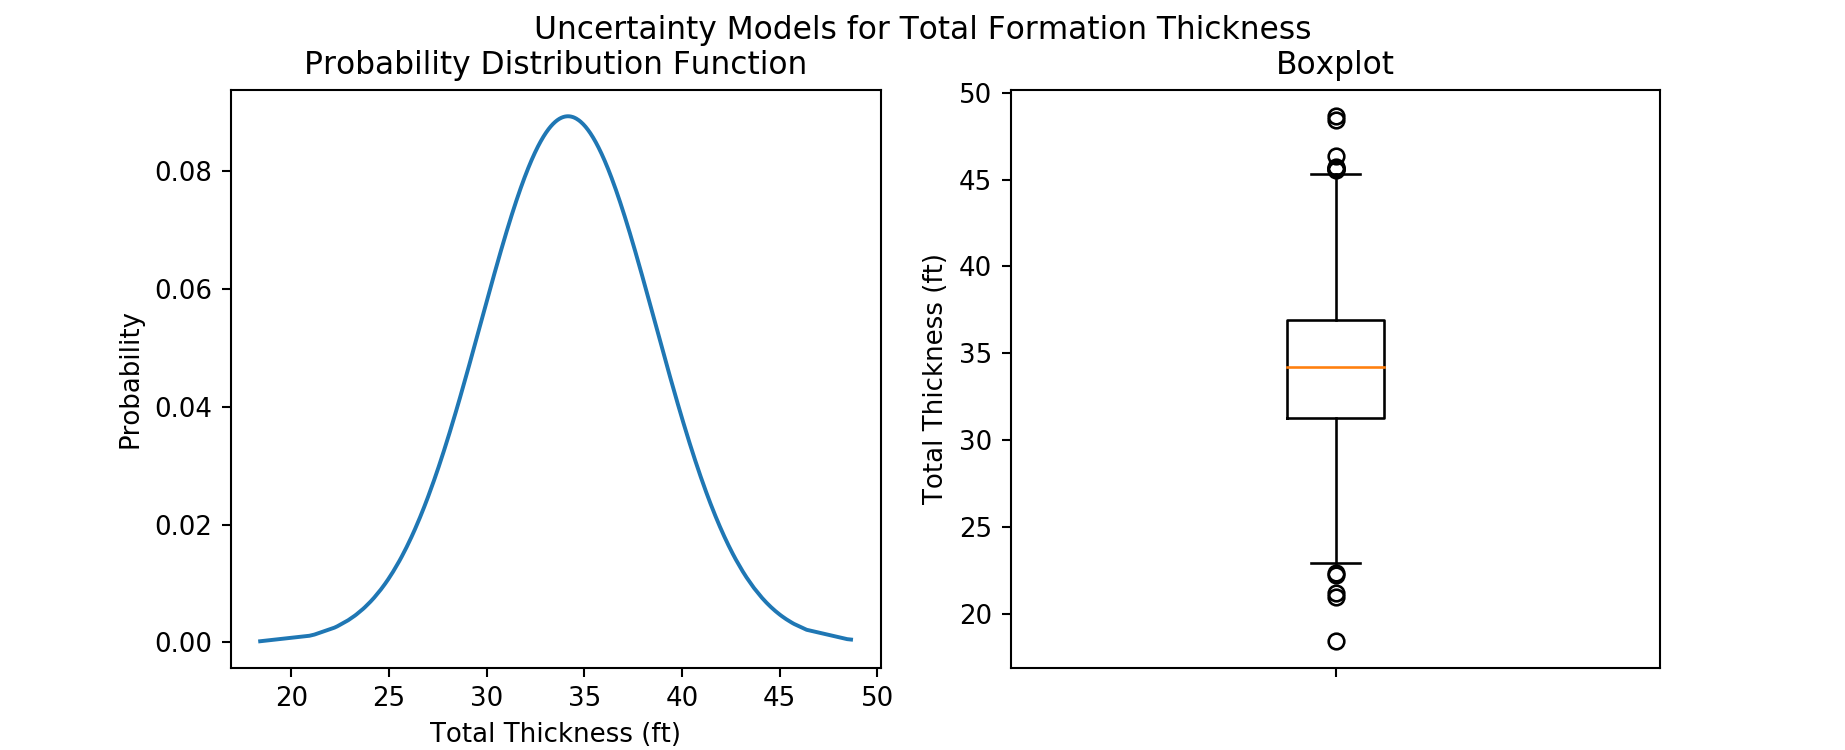

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Uncertainty Models for Total Formation Thickness')

visualize_distribution(df_thic['Total Thickness (ft)'].to_frame(), ax1)
ax1.set_title('Probability Distribution Function')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Total Thickness (ft)')

ax2.boxplot(df_thic['Total Thickness (ft)'])
ax2.set_title('Boxplot')
ax2.set_ylabel('Total Thickness (ft)');
ax2.set_xticklabels([]);

** Business Decision on P10, P50, and P90 Statistics **

Many of the business decisions are made on P10, P50, and P90 values. When reporting your statistical analysis to the management, you want to provide them the most likely *range* of outcome.

In [36]:
pd.DataFrame(df_thic['Total Thickness (ft)'].describe(percentiles=[0.1, 0.9])).T.iloc[:, 4:7].round(1)

,10%,50%,90%
Total Thickness (ft),28.6,34.2,39.9


Based on the obtained P10, P50, and P90 values, the following forcast can be constructed:

<div class="alert alert-info">
    <p>The total formation thickness will fall within the range of 28.6 ~ 39.9 ft by 80% chance, with 34.2 ft being the mean of the distribution.</p>
</div>